In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
url = "Full_data.csv"
df = pd.read_csv(url)
df.describe()

,DEPTH,LATITUDE,LONGITUDE,SALINITY,TEMPERATURE,CPHL,Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,...,Oa12_radiance,Oa13_radiance,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,646.000000,...,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,2.684786,10.461361,-3.121178,33.541130,22.636467,5.141630,1.610683e+05,1.627106,1.503816,1.324144,...,0.387463,0.270362,0.226076,0.202088,0.246525,0.207191,0.205474,0.163363,0.071566,0.066238
std,3.777778,29.464631,73.609424,6.263416,8.017222,15.248551,4.884539e+05,0.859736,0.868608,0.904638,...,0.442925,0.356090,0.327896,0.260764,0.290378,0.242752,0.248200,0.206701,0.101411,0.091473
min,0.000199,-21.568310,-158.990000,6.556000,0.434000,0.000000,0.000000e+00,0.361457,0.352295,0.299515,...,0.032398,0.007497,0.008651,0.010536,0.018559,0.009860,0.010999,0.005028,0.001632,0.003241
25%,0.000249,-19.050987,-27.225407,33.586252,21.053001,0.079250,1.004148e+00,1.124533,0.985515,0.760307,...,0.100794,0.052478,0.047582,0.044776,0.055678,0.044370,0.038497,0.030171,0.009791,0.009724
50%,0.000428,2.568500,-24.249015,35.816502,25.924501,0.131000,1.509709e+00,1.378892,1.233032,1.019502,...,0.208788,0.125572,0.099489,0.098771,0.132567,0.108461,0.104493,0.077941,0.029374,0.029171
75%,5.340494,30.123250,69.092678,37.108002,28.481001,0.716500,2.924793e+04,1.860835,1.711364,1.506214,...,0.481473,0.306433,0.275757,0.256805,0.315509,0.261292,0.263982,0.201767,0.084858,0.083460
max,26.752193,58.872000,91.503000,37.607002,31.066001,79.000000,1.988859e+06,6.184933,5.958643,5.742620,...,2.426265,2.020398,2.145498,1.643550,1.638525,1.232510,1.308910,1.116320,0.610327,0.508865


In [3]:
variance = df.var()
variance

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10600\1609686221.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var()


DEPTH            1.427161e+01
LATITUDE         8.681645e+02
LONGITUDE        5.418347e+03
SALINITY         3.923038e+01
TEMPERATURE      6.427585e+01
CPHL             2.325183e+02
Oa01_radiance    2.385873e+11
Oa02_radiance    7.391461e-01
Oa03_radiance    7.544805e-01
Oa04_radiance    8.183707e-01
Oa05_radiance    6.837810e-01
Oa06_radiance    9.339198e-01
Oa07_radiance    4.017127e-01
Oa08_radiance    3.771319e-01
Oa09_radiance    4.353479e-01
Oa10_radiance    7.336698e+10
Oa11_radiance    1.998408e-01
Oa12_radiance    1.961823e-01
Oa13_radiance    1.268002e-01
Oa14_radiance    1.075156e-01
Oa15_radiance    6.799785e-02
Oa16_radiance    8.431922e-02
Oa17_radiance    5.892840e-02
Oa18_radiance    6.160334e-02
Oa19_radiance    4.272539e-02
Oa20_radiance    1.028427e-02
Oa21_radiance    8.367306e-03
dtype: float64

## RF

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from scipy.stats import pearsonr


best_n_estimators = 100
best_max_depth = 25
best_min_samples_split = 2
best_min_samples_leaf = 4
best_max_features = 'sqrt'  

best_rf = RandomForestRegressor(n_estimators=best_n_estimators, 
                               max_depth=best_max_depth, 
                               min_samples_split=best_min_samples_split, 
                               min_samples_leaf=best_min_samples_leaf, 
                               max_features=best_max_features)

feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
                 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
                 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
                 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']#, 'BR1', 'BR2', 'BR3']
label = 'SALINITY'

X = df[feature_names]
y = df[label]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Train the model
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

print('RMSE: ', rmse)
print('p-value: ', p_value)
print('r: ', r_value)

RMSE:  4.782289100974251
p-value:  2.8820425755170824e-21
r:  0.6113246711456322


In [ ]:
#validation
dfvd=pd.read_csv(r"C:\Users\lenovo\Downloads\validation_data.csv")
y_pred_v = best_rf.predict(dfvd[feature_names])

rmse = np.sqrt(mean_squared_error(dfvd['Salinity'], y_pred_v))
mae = mean_absolute_error(dfvd['Salinity'], y_pred_v)
r_values, _ = pearsonr(dfvd['Salinity'], y_pred_v)
r2 = r2_score(dfvd['Salinity'], y_pred_v)
slope, intercept, r_value, p_value, std_err = stats.linregress(dfvd['Salinity'], y_pred_v)


print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Values: {r_values}")
print(f"R^2 Score: {r2}")
print(f"p-Value: {p_value}")
print(f"r_values: {r_values}")

#### Feature Importance

In [6]:
# Get feature importance scores
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# y_pred = best_rf.predict(X_test)


feature_importance = rf.feature_importances_
print(feature_importance)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
bands=['400.00', '412.50',  '442.50', '490.00', '510.00', '560.00', '620.00', '665.00', '673.75', '681.25', '708.75', '753.75', '761.25', '764.38', '767.50', '778.75', '865.00', '885.00', '900.00', '940.00', '1020.00']
feature_importance_df['Bands']=bands

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


[0.03979172 0.28854589 0.04497548 0.02298435 0.01873188 0.02568172
 0.0403085  0.01946409 0.01729741 0.03435346 0.01530555 0.02948971
 0.07165999 0.05411577 0.04060074 0.02232452 0.01488852 0.03958885
 0.0638605  0.04967026 0.04636109]
          Feature  Importance    Bands
1   Oa02_radiance    0.288546   412.50
12  Oa13_radiance    0.071660   761.25
18  Oa19_radiance    0.063860   900.00
13  Oa14_radiance    0.054116   764.38
19  Oa20_radiance    0.049670   940.00
20  Oa21_radiance    0.046361  1020.00
2   Oa03_radiance    0.044975   442.50
14  Oa15_radiance    0.040601   767.50
6   Oa07_radiance    0.040309   620.00
0   Oa01_radiance    0.039792   400.00
17  Oa18_radiance    0.039589   885.00
9   Oa10_radiance    0.034353   681.25
11  Oa12_radiance    0.029490   753.75
5   Oa06_radiance    0.025682   560.00
3   Oa04_radiance    0.022984   490.00
15  Oa16_radiance    0.022325   778.75
7   Oa08_radiance    0.019464   665.00
4   Oa05_radiance    0.018732   510.00
8   Oa09_radiance    0.

Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\feature_importance_plot_sen_rf01.pdf


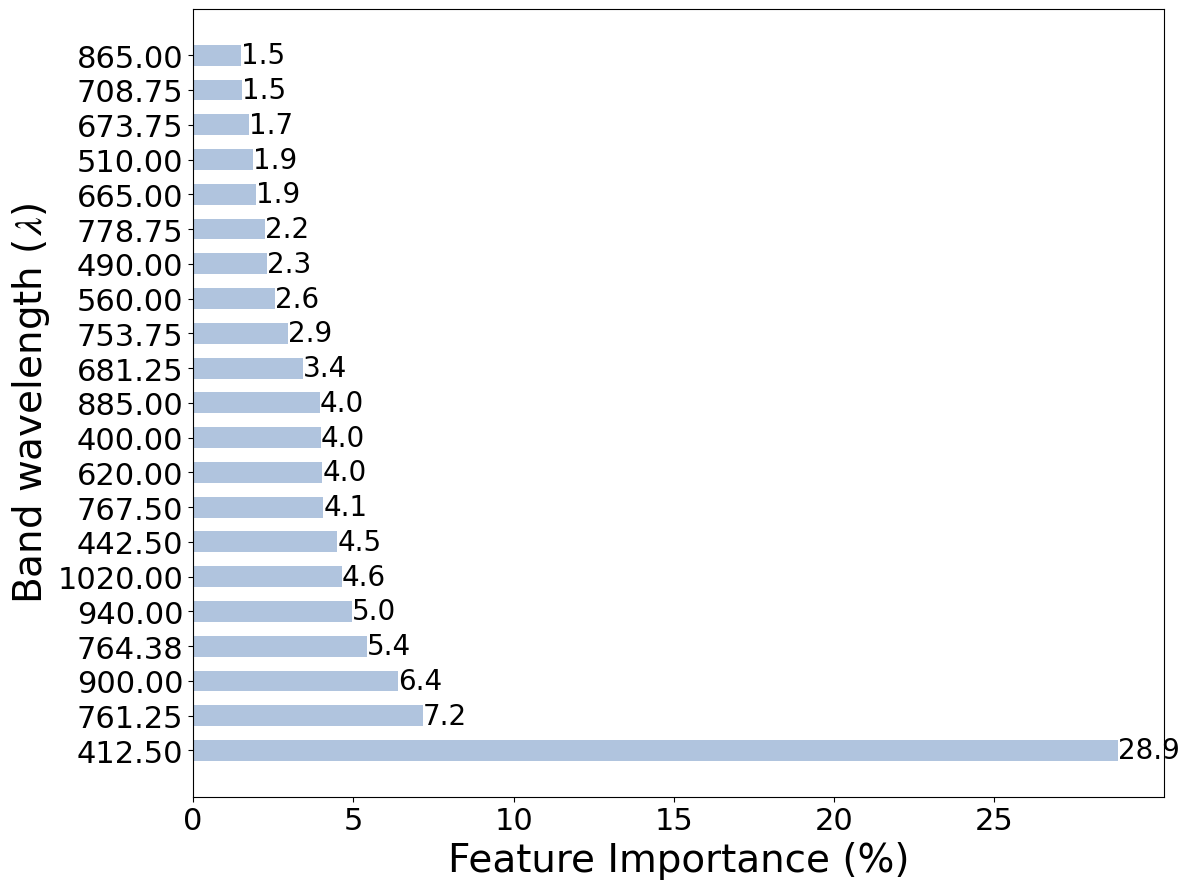

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import rc

import os


# Sort the feature importance dataframe by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Set figure size
plt.figure(figsize=(12, 9))

# Plot the data with custom colors and make the bars thin
bars = plt.barh(feature_importance_df['Bands'], feature_importance_df['Importance'] * 100, color='lightsteelblue', height=0.6)



italics_lambda = '\U0001D706'
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Feature Importance (%)', fontsize=28)

# plt.ylabel('Band wavelength ($\mathit{\lambda}$)', fontsize=28)
plt.ylabel(u'Band wavelength (${\U0001D706}$)', fontsize=28)
# plt.ylabel(r'Band wavelength ($\mathcal{r}$)', fontsize=12)

#, fontdict={'fontstyle': 'italic'})
# plt.ylabel('Band Wavelength (r"$\textit{\lambda}$")', fontsize=28)#, fontdict={'fontstyle': 'italic'})


plt.xticks(range(0,30,5))

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', ha='left', va='center', fontsize=20, color='black')

# Invert the y-axis to have the most important features at the bottom
plt.gca().invert_yaxis()
plt.tight_layout()

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
file_name = 'feature_importance_plot_sen_rf01.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')


plt.show()


In [26]:
# 𝜆
italics_lambda = '\U0001D706'
print(italics_lambda)

𝜆


In [126]:
from matplotlib import font_manager

In [6]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats

# Initialize empty arrays to store the results
rmse_values_rf = []
mbe_values_rf = []
me_values_rf = []

# Assuming you have a RandomForestRegressor instance named 'rf'
# and your data (X_train, X_test, y_train, y_test) are already prepared

for i in range(100):  # Run the code 100 times
    
    feature_name = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
    rf_feature_name = ['Oa02_radiance',  'Oa13_radiance',  'Oa19_radiance',  'Oa20_radiance',  'Oa03_radiance',  'Oa14_radiance']
    feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
                 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
                 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
                 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance', 'BR1', 'BR2', 'BR3']
    X = df[feature_name]
    y = df[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
   
    
    best_n_estimators = 450  
    best_max_depth = 10  
    best_min_samples_split = 4
    best_min_samples_leaf = 1 
    best_max_features = 'sqrt'  

    rf = RandomForestRegressor(n_estimators=best_n_estimators, 
                                   max_depth=best_max_depth, 
                                   min_samples_split=best_min_samples_split, 
                                   min_samples_leaf=best_min_samples_leaf, 
                                   max_features=best_max_features)

    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

    rmse_values_rf.append(rmse)  
    
    # Assuming you have observed and predicted values as numpy arrays
    observed_values = np.array(y_test)
    predicted_values = np.array(y_pred)

    # Calculate Mean Error (ME)
    mean_error = np.mean(predicted_values - observed_values)
    me_values_rf.append(mean_error)  # Append ME to the array

    # Calculate Mean Bias Error (MBE)
    mbe = np.mean(np.abs(predicted_values - observed_values))
    mbe_values_rf.append(mbe)  # Append MBE to the array

# Convert the result arrays to numpy arrays
rmse_values_rf = np.array(rmse_values_rf)
mbe_values_rf = np.array(mbe_values_rf)
me_values_rf = np.array(me_values_rf)

# Print or save the results as needed
print("RMSE values:", rmse_values_rf)
print("MBE values:", mbe_values_rf)
print("ME values:", me_values_rf)


RMSE values: [5.64939837 5.18644099 4.52548331 5.17079102 4.37416166 5.23821078
 4.1893441  5.63820316 5.28484342 4.22604173 5.01861502 5.90577132
 4.96034106 5.22516366 4.95349448 5.32754309 4.4878878  4.53133121
 5.09049688 4.77391246 4.81585652 4.40626834 4.9721743  4.48264596
 4.98822459 4.39383328 4.61739704 5.16831047 4.26983363 4.98176791
 4.46390061 4.47523256 4.24776785 5.6422001  5.16531692 5.4388618
 4.59503692 4.05872164 4.53225956 4.6906333  4.67461204 4.8439473
 4.77102809 4.78231594 5.23999388 4.50860124 4.9170221  4.44094121
 4.48917255 5.93389315 4.70609276 4.02705614 6.01118005 4.51589675
 5.3423238  5.66157086 5.14129805 4.45597684 5.43759209 4.60066682
 4.99277946 4.88349901 5.67055034 5.66896115 4.56065434 5.07472675
 5.30804792 5.33811923 5.62141708 5.4365825  4.69726139 5.47690395
 4.83198804 4.45830515 5.08512707 5.44723274 5.03256473 4.70639956
 5.00247852 3.78098502 5.72756968 5.56869315 4.57184644 4.94366265
 4.94427623 5.60547639 4.89002089 5.01872325 4.4804

#### Scatter Plot

In [28]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)


rf_feature_name = ['Oa02_radiance',  'Oa13_radiance',  'Oa19_radiance',  'Oa20_radiance',  'Oa03_radiance',  'Oa14_radiance']

feature_name = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
                 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
                 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
                 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']#, 'BR1', 'BR2', 'BR3']
label = 'SALINITY'

X = df[rf_feature_name]
y = df[label]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)


P-Value in Custom Notation: 2.0 $\times$ 10$^{⁰}$
Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average\scatter_plot_sen_rf.pdf


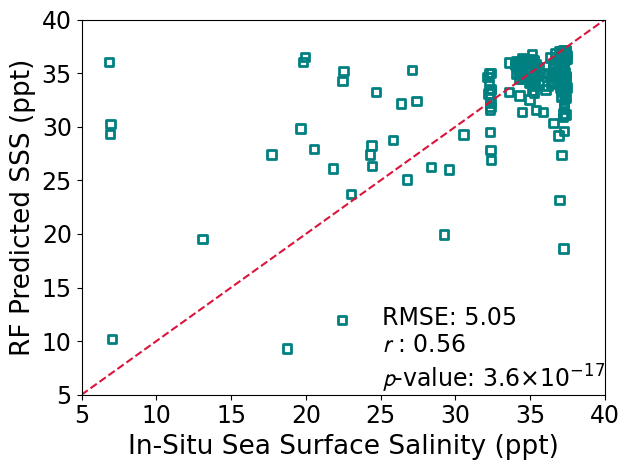

In [9]:
def int_to_superscript(value):
    superscript_dict = {
        '0': '⁰',
        '1': '¹',
        '2': '²',
        '3': '³',
        '4': '⁴',
        '5': '⁵',
        '6': '⁶',
        '7': '⁷',
        '8': '⁸',
        '9': '⁹',
        '-': '⁻'
    }
    return ''.join(superscript_dict[c] for c in str(value))

if p_value == 0:
    p_value_str = "0.0"
else:
    exponent = 0
    while p_value < 1:
        p_value *= 10
        exponent -= 1
    exponent_str = int_to_superscript(exponent)
#     p_value_str = "{:.1f} x 10{}".format(p_value, exponent_str)
    p_value_str = "{:.1f} $\\times$ 10$^{{{}}}$".format(p_value, exponent_str)
    
print("P-Value in Custom Notation:", p_value_str)

# Create a line representing the identity line (y = x)
x_line = np.linspace(5, 40, 100)  
y_line = x_line  # y = x

# Identity line in red
plt.plot(x_line, y_line, color='crimson', linestyle='--')

# Set the plot limits to start from (5, 5)
plt.xlim(5, 40)
plt.ylim(5, 40)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Scatter plot for testing data (in dark blue) as squares
plt.scatter(y_test, y_pred, label='Testing Data', alpha=1, marker='s',facecolor='none', color='teal', linewidths=2)

# Add labels and legend
plt.xlabel('In-Situ Sea Surface Salinity (ppt)', fontsize=19)
plt.ylabel('RF Predicted SSS (ppt)', fontsize=19)
# plt.legend(fontsize=14)



# textstr = '\n'.join((
#     'RMSE: 5.21',
#     f'  : {r_value:.2f}',  
#     f'  -value: {p_value_str}'
# ))

# textstr2 = '\n'.join(('r','p'))
# plt.figtext(0.65, .185, textstr2, fontsize=15, fontstyle='italic')

# plt.figtext(0.65, .185, textstr, fontsize=15)

p_val = "{:.1f} $\\times$ 10$^{{{}}}$".format(3.6, 17)
r=0.56
# Construct the text string
textstr = '\n'.join((
    'RMSE: 5.05',
    r'$\mathcal{r}$ : 0.56',
    r'$\mathcal{p}$-value: 3.6$\times$10$^{-17}$'))

plt.figtext(0.605, 0.185, textstr, fontsize=17)
textstr2 = '\n'.join(('r','p'))
# plt.figtext(0.65, .185, textstr2, fontsize=15, fontstyle='italic')

# plt.figtext(0.65, .185, textstr, fontsize=15)

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average'
file_name = 'scatter_plot_sen_rf.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()


In [45]:
p_val = "{:.1f} $\\times$ 10$^{{{}}}$".format(3.6, 17)
print(r'$\mathcal{r}$')

$\mathcal{r}$


########################################################################################

# SVM

## RBF

In [29]:
svr_feature_name = ['Oa02_radiance','BR1', 'BR2', 'BR3',  'Oa13_radiance',  'Oa19_radiance',  'Oa20_radiance',  'Oa03_radiance',  'Oa14_radiance']
feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
                 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
                 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
                 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']#, 'BR1', 'BR2', 'BR3']
label = 'SALINITY'


X = df[feature_names]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.svm import SVR 
# Create an sv regressor
svr = SVR(kernel='rbf', C=1, epsilon=0.3, gamma=3)  

# Fit the model to the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)


5.673293720316535


In [ ]:
# validation;
y_pred_v_rbf=svr.predict(dfvd[feature_name])

rmse = np.sqrt(mean_squared_error(dfvd['Salinity'], y_pred_v_rbf))
mae = mean_absolute_error(dfvd['Salinity'], y_pred_v_rbf)
r_values, _ = pearsonr(dfvd['Salinity'], y_pred_v_rbf)
r2 = r2_score(dfvd['Salinity'], y_pred_v_rbf)
slope, intercept, r_value, p_value, std_err = stats.linregress(dfvd['Salinity'], y_pred_v_rbf)


print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Values: {r_values}")
print(f"R^2 Score: {r2}")
print(f"p-Value: {p_value}")
print(f"r_values: {r_values}")


In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)


SSR = np.sum((y_pred - (slope * y_test + intercept))**2)
SST = np.sum((y_test - np.mean(y_test))**2)
R_squared = 1 - (SSR / SST)

print("R-squared value:", R_squared)

P-Value in Custom Notation: 1.1 $\times$ 10$^{⁻⁹}$
Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average\scatter_plot_sen_svr.pdf


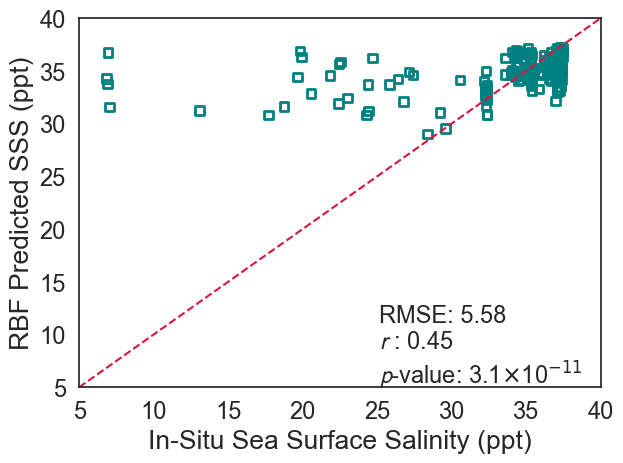

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats
import os
import math

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

SSR = np.sum((y_pred - (slope * y_test + intercept))**2)
SST = np.sum((y_test - np.mean(y_test))**2)
R_squared = 1 - (SSR / SST)

def int_to_superscript(value):
    superscript_dict = {
        '0': '⁰',
        '1': '¹',
        '2': '²',
        '3': '³',
        '4': '⁴',
        '5': '⁵',
        '6': '⁶',
        '7': '⁷',
        '8': '⁸',
        '9': '⁹',
        '-': '⁻'
    }
    return ''.join(superscript_dict[c] for c in str(value))

if p_value == 0:
    p_value_str = "0.0"
else:
    exponent = 0
    while p_value < 1:
        p_value *= 10
        exponent -= 1
    exponent_str = int_to_superscript(exponent)
    p_value_str = "{:.1f} $\\times$ 10$^{{{}}}$".format(p_value, exponent_str)
    
print("P-Value in Custom Notation:", p_value_str)

# Create a line representing the identity line (y = x)
x_line = np.linspace(5, 40, 100)  
y_line = x_line  # y = x

# Identity line in red
plt.plot(x_line, y_line, color='crimson', linestyle='--')

# Set the plot limits to start from (5, 5)
plt.xlim(5, 40)
plt.ylim(5, 40)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Scatter plot for testing data (in dark blue) as squares
plt.scatter(y_test, y_pred, label='Testing Data', alpha=1, marker='s',facecolor='none', color='teal', linewidths=2)

# Add labels and legend
plt.xlabel('In-Situ Sea Surface Salinity (ppt)', fontsize=19)
plt.ylabel('RBF Predicted SSS (ppt)', fontsize=19)
# plt.legend(fontsize=14)

rmse=sqrt(mean_squared_error(y_test, y_pred))




# textstr = '\n'.join((
#     'RMSE: 5.94',
#     f'  : {r_value:.2f}',  
#     f'  -value: {p_value_str}'
# ))

# textstr2 = '\n'.join(('r','p'))
# plt.figtext(0.65, .185, textstr2, fontsize=15, fontstyle='italic')
textstr = '\n'.join((
    'RMSE: 5.58',
    r'$\mathcal{r}$ : 0.45',
    r'$\mathcal{p}$-value: 3.1$\times$10$^{-11}$'))

plt.figtext(0.605, 0.185, textstr, fontsize=17)



# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average'
file_name = 'scatter_plot_sen_svr.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()


In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats

# Initialize empty arrays to store the results
rmse_values_svr = []
mbe_values_svr = []
me_values_svr = []



for i in range(100):  # Run the code 20 times
    
    
    svr_feature_name = ['Oa02_radiance','BR1', 'BR2', 'BR3', 'Oa13_radiance',  'Oa19_radiance',  'Oa20_radiance',  'Oa03_radiance',  'Oa14_radiance']
    
    X = df[feature_names]
    y = df[label]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i) 
    
    
    # Create an sv regressor
    svr = SVR(kernel='rbf', C=1, epsilon=0.3, gamma=3)  
    # Fit the model to the training data
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

    rmse_values_svr.append(rmse)  
    # Assuming you have observed and predicted values as numpy arrays
    observed_values = np.array(y_test)
    predicted_values = np.array(y_pred)

    # Calculate Mean Error (ME)
    mean_error = np.mean(predicted_values - observed_values)
    me_values_svr.append(mean_error)  # Append ME to the array

    # Calculate Mean Bias Error (MBE)
    mbe = np.mean(np.abs(predicted_values - observed_values))
    mbe_values_svr.append(mbe)  # Append MBE to the array

# Convert the result arrays to numpy arrays
rmse_values_svr = np.array(rmse_values_svr)
mbe_values_svr = np.array(mbe_values_svr)
me_values_svr = np.array(me_values_svr)

# Print or save the results as needed
print("RMSE values:", rmse_values_svr)
print("MBE values:", mbe_values_svr)
print("ME values:", me_values_svr)


RMSE values: [6.81252657 6.55052201 4.53243772 6.40989623 4.85106327 6.51830914
 5.60186609 6.92750362 6.26158496 5.15036041 6.21979174 7.1896536
 5.91652379 6.778185   5.2228592  7.06638827 5.39875367 5.18044593
 6.05431061 5.69808179 6.24413825 4.92722533 6.83622057 5.51938021
 6.34781146 5.39034257 4.90340492 4.98366446 5.61263803 6.66693236
 5.61958455 5.12158019 5.26104845 7.12031196 5.7372539  6.8180184
 5.76823783 5.17301221 4.86214756 5.84050186 6.2011465  5.72181077
 5.67329372 5.49208575 5.97935877 4.1694851  5.49775568 5.68399166
 5.35243626 6.86633055 5.8245468  5.03002233 7.38746811 6.19375416
 6.6632007  6.99091223 5.78626989 4.92947181 6.75170574 5.50500089
 6.2247019  5.68607904 6.04846883 6.34341902 4.97823234 6.31094903
 6.08724598 6.17754265 6.86213752 6.47473352 4.72121823 7.06632082
 6.26907241 5.16125345 6.29367769 6.78625746 6.61411052 5.98150072
 5.77609638 4.75753285 6.59547985 6.72296736 6.10241809 6.54636719
 6.11451552 6.01757674 5.55665473 6.48238185 5.4898

## Laplace

In [32]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

def laplacian_kernel(X1, X2, gamma):
    return np.exp(-gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2))



feature_name = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
rf_imp_feature_name = ['Oa02_radiance',  'Oa13_radiance',  'Oa19_radiance',  'Oa20_radiance',  'Oa03_radiance',  'Oa14_radiance']

feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
                 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
                 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
                 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance', 'BR1', 'BR2', 'BR3']
label = 'SALINITY'

X = df[feature_name]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

# Standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1.0, 10.0],
    'gamma': [0.01, 0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 1.0]
}


gamma = 3  
laplacian_matrix_train = laplacian_kernel(X_train, X_train, gamma )

svr = SVR(kernel='precomputed')
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(laplacian_matrix_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'C': 10.0, 'epsilon': 1.0, 'gamma': 0.01}


In [33]:
df['BR1']=df.Oa08_radiance/df.Oa06_radiance
df['BR2']=df.Oa08_radiance/df.Oa04_radiance
df['BR3']=df.Oa08_radiance/df.Oa03_radiance

In [34]:
C = 20
gamma =3
epsilon = 0.01 


def laplacian_kernel(X1, X2, gamma):
    return np.exp(-gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2))



feature_name = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
rf_imp_feature_name = ['Oa02_radiance',  'Oa13_radiance',  'Oa19_radiance',  'Oa20_radiance',  'Oa03_radiance',  'Oa14_radiance']#, 'BR1', 'BR2', 'BR3']

feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
                 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
                 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
                 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance', 'BR1', 'BR2', 'BR3']
label = 'SALINITY'

X = df[rf_imp_feature_name]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

# Standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


laplacian_matrix_train = laplacian_kernel(X_train, X_train, gamma)

svr_l = SVR(kernel='precomputed', C=C, gamma=gamma, epsilon=epsilon)

svr_l.fit(laplacian_matrix_train, y_train)


SVR(C=20, epsilon=0.01, gamma=3, kernel='precomputed')

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

laplacian_matrix_test = laplacian_kernel(X_test, X_train, gamma)

salinity_predictions = svr_l.predict(laplacian_matrix_test)

rmse = np.sqrt(mean_squared_error(y_test, salinity_predictions))
mae = mean_absolute_error(y_test, salinity_predictions)
r_value, _ = pearsonr(y_test, salinity_predictions)
r2 = r2_score(y_test, salinity_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Value: {r_value}")
print(f"R^2 Score: {r2}")


RMSE: 4.762790027474961
MAE: 2.340377957761668
R-Value: 0.45555843337345975
R^2 Score: 0.16578255655625107


P-Value in Custom Notation: 2.5 $\times$ 10$^{⁻¹¹}$
Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average\scatter_plot_sen_svr_l.pdf


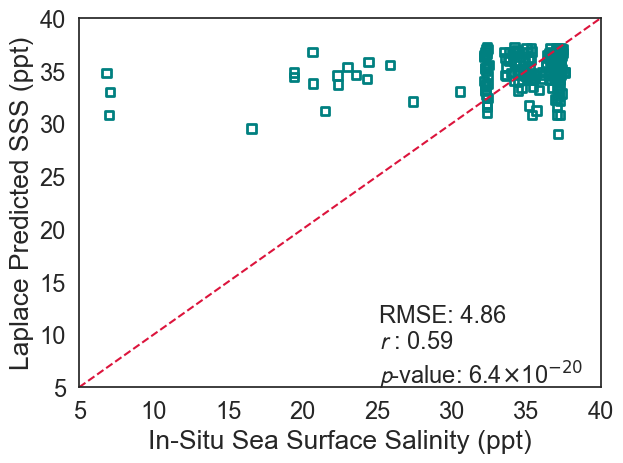

RMSE: 4.762790027474961
MAE: 2.340377957761668
R-Value: 0.4555584333734596
R^2 Score: 0.16578255655625107


In [36]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, salinity_predictions)


def int_to_superscript(value):
    superscript_dict = {
        '0': '⁰',
        '1': '¹',
        '2': '²',
        '3': '³',
        '4': '⁴',
        '5': '⁵',
        '6': '⁶',
        '7': '⁷',
        '8': '⁸',
        '9': '⁹',
        '-': '⁻'
    }
    return ''.join(superscript_dict[c] for c in str(value))

if p_value == 0:
    p_value_str = "0.0"
else:
    exponent = 0
    while p_value < 1:
        p_value *= 10
        exponent -= 1
    exponent_str = int_to_superscript(exponent)
    p_value_str = "{:.1f} $\\times$ 10$^{{{}}}$".format(p_value, exponent_str)
    
print("P-Value in Custom Notation:", p_value_str)

# Create a line representing the identity line (y = x)
x_line = np.linspace(5, 40, 100)  
y_line = x_line  # y = x

# Identity line in red
plt.plot(x_line, y_line, color='crimson', linestyle='--')

# Set the plot limits to start from (5, 5)
plt.xlim(5, 40)
plt.ylim(5, 40)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Scatter plot for testing data (in dark blue) as squares
plt.scatter(y_test, y_pred, label='Testing Data', alpha=1, marker='s',facecolor='none', color='teal', linewidths=2)

# Add labels and legend
plt.xlabel('In-Situ Sea Surface Salinity (ppt)', fontsize=19)
plt.ylabel('Laplace Predicted SSS (ppt)', fontsize=19)
# plt.legend(fontsize=14)




# textstr = '\n'.join((
#     'RMSE: 4.92',
#     f'  : {r_value:.2f}',  
#     f'  -value: {p_value_str}'
# ))

# textstr2 = '\n'.join(('r','p'))
# plt.figtext(0.65, .185, textstr2, fontsize=15, fontstyle='italic')
textstr = '\n'.join((
    'RMSE: 4.86',
    r'$\mathcal{r}$ : 0.59',
    r'$\mathcal{p}$-value: 6.4$\times$10$^{-20}$'))

plt.figtext(0.605, 0.185, textstr, fontsize=17)


# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average'
file_name = 'scatter_plot_sen_svr_l.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Value: {r_value}")
print(f"R^2 Score: {r2}")


In [15]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats

# Initialize empty arrays to store the results
rmse_values_svr_laplace = []
mbe_values_svr_laplace = []
me_values_svr_laplace = []

# Assuming you have a RandomForestRegressor instance named 'rf'
# and your data (X_train, X_test, y_train, y_test) are already prepared

C = 10
gamma = 1
epsilon = 0.1 

for i in range(100):  # Run the code 20 times
# Define your Laplacian kernel function



    def laplacian_kernel(X1, X2, gamma):
        return np.exp(-gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2))



    feature_name = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
    rf_imp_feature_name = ['Oa02_radiance',  'Oa13_radiance',  'Oa19_radiance',  'Oa20_radiance',  'Oa03_radiance',  'Oa14_radiance']

    feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
                     'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
                     'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
                     'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
    label = 'SALINITY'

    X = df[feature_name]
    y = df[label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Standarization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    laplacian_matrix_train = laplacian_kernel(X_train, X_train, gamma)
    laplacian_matrix_test = laplacian_kernel(X_test, X_train, gamma)

    svr_l = SVR(kernel='precomputed', C=C, gamma=gamma, epsilon=epsilon)

    svr_l.fit(laplacian_matrix_train, y_train)


    # Use the best SVR model with Laplacian kernel to predict salinity for testing data
    y_pred = svr_l.predict(laplacian_matrix_test)

    

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

    rmse_values_svr_laplace.append(rmse)  
    
    # Assuming you have observed and predicted values as numpy arrays
    observed_values = np.array(y_test)
    predicted_values = np.array(y_pred)

    # Calculate Mean Error (ME)
    mean_error = np.mean(predicted_values - observed_values)
    me_values_svr_laplace.append(mean_error)  # Append ME to the array

    # Calculate Mean Bias Error (MBE)
    mbe = np.mean(np.abs(predicted_values - observed_values))
    mbe_values_svr_laplace.append(mbe)  # Append MBE to the array

# Convert the result arrays to numpy arrays
rmse_values_svr_laplace = np.array(rmse_values_svr_laplace)
mbe_values_svr_laplace = np.array(mbe_values_svr_laplace)
me_values_svr_laplace = np.array(me_values_svr_laplace)

# Print or save the results as needed
print("RMSE values:", rmse_values_svr_laplace)
print("MBE values:", mbe_values_svr_laplace)
print("ME values:", me_values_svr_laplace)


RMSE values: [6.19351494 5.83503843 4.37746062 5.97267128 4.19675642 5.64858825
 4.89949302 6.47917057 5.79372913 4.37181879 5.58424461 6.54025858
 5.25866874 6.06663106 4.81716772 6.59162455 4.72088252 4.4915777
 5.44714673 5.19021726 5.4379821  4.43758573 6.43536686 4.80532532
 5.80955703 4.79972895 4.46679474 4.7986746  5.19300723 6.21303892
 4.90475781 4.56165372 4.48846597 6.41950609 5.42909788 6.39503926
 4.94937107 4.56849908 4.37892433 5.15989744 5.62246011 5.15393399
 5.01670828 4.9234144  5.54722333 3.98607848 4.67044736 4.92488632
 4.8024923  6.32628431 5.30467095 4.08486333 6.92060294 5.40604145
 6.11568602 6.25851398 5.27846274 4.59226421 6.17834284 5.00685322
 5.96834872 5.14150304 5.63790958 5.84941246 4.41076481 5.38388802
 5.57259422 5.56638026 6.16194342 5.89049003 4.21597179 6.4675072
 5.63683339 4.64825069 5.6272976  6.15499706 6.01931652 5.41262226
 5.17925446 4.1436152  6.07881499 6.16254795 5.63545421 5.89753099
 5.48165947 5.60948613 5.07129834 5.96041166 4.7196

In [16]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats

# Initialize empty arrays to store the results
rmse_values_svr_laplace = []
mbe_values_svr_laplace = []
me_values_svr_laplace = []

# Assuming you have a RandomForestRegressor instance named 'rf'
# and your data (X_train, X_test, y_train, y_test) are already prepared

for i in range(100):  # Run the code 20 times
# Define your Laplacian kernel function
    def laplacian_kernel(X1, X2, gamma):
        return np.exp(-gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2))

# Define feature names and label
    rf_imp_feature_name = ['Oa02_radiance',  'Oa13_radiance',  'Oa19_radiance',  'Oa20_radiance',  'Oa03_radiance',  'Oa14_radiance']
    feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
                 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
                 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
                 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
    label = 'SALINITY'
    
# Select features and target variable
    X = df[feature_names]
    y = df[label]

# Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define hyperparameters for tuning
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'gamma': [0.01, 0.1, 1.0, 10.0],
        'epsilon': [0.01, 0.1, 1.0]
    }

    # Calculate the Laplacian kernel values for training and testing data
    # gamma = 1.0  # You can adjust the value of gamma
    laplacian_matrix_train = laplacian_kernel(X_train, X_train, gamma)
    laplacian_matrix_test = laplacian_kernel(X_test, X_train, gamma)

    # Create the SVR model with Laplacian kernel
    svr = SVR(kernel='precomputed')

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(svr, param_grid, cv=5)
    grid_search.fit(laplacian_matrix_train, y_train)

    # Get the best SVR model
    best_svr = grid_search.best_estimator_

    # Print the best hyperparameters
    best_params = grid_search.best_params_
#     print("Best Hyperparameters:")
#     print(best_params)

    # Use the best SVR model with Laplacian kernel to predict salinity for testing data
    y_pred = best_svr.predict(laplacian_matrix_test)

    

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

    rmse_values_svr_laplace.append(rmse)  
    
    # Assuming you have observed and predicted values as numpy arrays
    observed_values = np.array(y_test)
    predicted_values = np.array(y_pred)

    # Calculate Mean Error (ME)
    mean_error = np.mean(predicted_values - observed_values)
    me_values_svr_laplace.append(mean_error)  # Append ME to the array

    # Calculate Mean Bias Error (MBE)
    mbe = np.mean(np.abs(predicted_values - observed_values))
    mbe_values_svr_laplace.append(mbe)  # Append MBE to the array

# Convert the result arrays to numpy arrays
rmse_values_svr_laplace = np.array(rmse_values_svr_laplace)
mbe_values_svr_laplace = np.array(mbe_values_svr_laplace)
me_values_svr_laplace = np.array(me_values_svr_laplace)

# Print or save the results as needed
print("RMSE values:", rmse_values_svr_laplace)
print("MBE values:", mbe_values_svr_laplace)
print("ME values:", me_values_svr_laplace)


RMSE values: [6.14999148 5.68229046 4.38124247 5.8994287  4.17946626 5.56488409
 4.79577487 6.32023735 5.72700593 4.38890058 5.48556119 6.43924618
 5.21628065 5.96215029 4.78788926 6.46815258 4.65609692 4.45975853
 5.35128498 5.15645865 5.34151695 4.46300427 6.25873863 4.77073358
 5.6915636  4.73774554 4.51422262 4.80194799 5.10687943 6.12501228
 4.92571975 4.53297826 4.44353307 6.305004   5.36051457 6.25505348
 4.90239978 4.51797142 4.30494166 5.11703978 5.57223359 5.05160072
 4.96091143 4.88301009 5.48806804 3.97712421 4.7221081  4.84866211
 4.76739302 6.20333164 5.19141614 4.02265882 6.81585578 5.28047995
 5.97975046 6.11689333 5.16504557 4.55861436 6.02453364 4.94828985
 5.83906766 5.09240683 5.53818962 5.78692868 4.38382838 5.33567385
 5.49597241 5.4858346  6.0667449  5.79409356 4.21620985 6.31532415
 5.57059415 4.59662968 5.55163645 6.06051485 5.91558037 5.32836322
 5.11526173 4.11440065 5.96091789 6.04627404 5.5407987  5.75836824
 5.38301565 5.58274592 5.02509468 5.82373298 4.69

## RMSE

In [19]:
df_rmse=pd.DataFrame({"RF":rmse_values_rf, "SVR_RBF":rmse_values_svr, "SVR_Laplace":rmse_values_svr_laplace})
# df_rmse=pd.DataFrame({"RF":rmse_values_svr_laplace, "SVR_RBF":rmse_values_svr, "SVR_Laplace":rmse_values_rf})
print(df_rmse.describe())

               RF     SVR_RBF  SVR_Laplace
count  100.000000  100.000000   100.000000
mean     5.295841    5.945884     4.922164
std      0.684239    0.731588     0.487091
min      3.846711    4.169485     3.780985
25%      4.769898    5.467046     4.529869
50%      5.341829    6.023755     4.943969
75%      5.827567    6.525324     5.238657
max      6.815856    7.387468     6.011180


In [20]:
#melt data frame into long format
df_rmse_melted = pd.melt(df_rmse)

#view first 10 rows of melted data frame
df_rmse_melted.head(10)

,variable,value
0,RF,6.149991
1,RF,5.682290
2,RF,4.381242
3,RF,5.899429
4,RF,4.179466
5,RF,5.564884
6,RF,4.795775
7,RF,6.320237
8,RF,5.727006
9,RF,4.388901


Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\violin_plot_sen_rmsee.pdf


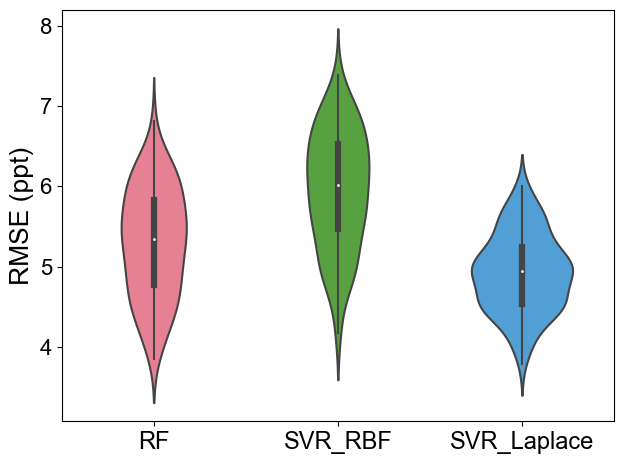

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(
    x='variable', y='value', data=df_rmse_melted,
    width=0.55,
    palette="husl",  
    inner="box",
     
)

sns.set(style="white")

plt.xlabel('', fontsize=20)
plt.ylabel('RMSE (ppt)', fontsize=19)
plt.xticks(fontsize=17)
plt.yticks(fontsize=16)

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
file_name = 'violin_plot_sen_rmsee.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()


## MBE

In [22]:
df_mbe=pd.DataFrame({"RF":mbe_values_rf, "SVR_RBF":mbe_values_svr, "SVR_Laplace":mbe_values_svr_laplace})

print(df_mbe)

          RF   SVR_RBF  SVR_Laplace
0   3.308837  3.321243     3.136785
1   3.088308  3.267020     3.048770
2   2.438108  2.332267     2.676214
3   2.989199  3.003820     2.996469
4   2.535238  2.522812     2.836012
..       ...       ...          ...
95  3.023103  3.090413     3.014894
96  2.457930  2.474915     2.582185
97  2.961927  2.862050     2.935006
98  3.348213  3.566571     3.107508
99  3.073303  3.107752     2.838136

[100 rows x 3 columns]


In [23]:
#melt data frame into long format
df_mbe_melted = pd.melt(df_mbe)

#view first 10 rows of melted data frame
df_mbe_melted.head(10)

,variable,value
0,RF,3.308837
1,RF,3.088308
2,RF,2.438108
3,RF,2.989199
4,RF,2.535238
5,RF,3.000548
6,RF,2.622248
7,RF,3.258316
8,RF,3.155623
9,RF,2.490179


Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\violin_plot_sen_mbe.pdf


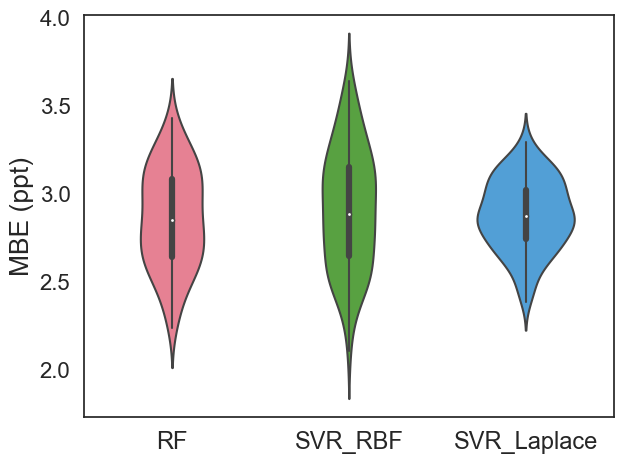

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(
    x='variable', y='value', data=df_mbe_melted,
    width=0.55,
    palette="husl",  
    inner="box",
     
)

sns.set(style="white")

plt.xlabel('', fontsize=20)
plt.ylabel('MBE (ppt)', fontsize=19)
plt.xticks(fontsize=17)
plt.yticks(fontsize=16)

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
file_name = 'violin_plot_sen_mbe.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()


## ME

In [25]:
df_me=pd.DataFrame({"RF":me_values_rf, "SVR_RBF":me_values_svr, "SVR_Laplace":me_values_svr_laplace})
# df_me=pd.DataFrame({"RF":me_values_svr_laplace, "SVR_RBF":me_values_svr, "SVR_Laplace":me_values_rf})
print(df_me)

          RF   SVR_RBF  SVR_Laplace
0   0.999221  2.074718     0.544680
1   0.982332  2.111072     0.016046
2  -0.002495  1.186384    -0.463790
3   0.825021  1.769720    -0.102215
4   0.183491  1.450887    -0.530249
..       ...       ...          ...
95  0.509654  1.860212    -0.407713
96 -0.080871  1.017927    -0.419444
97  0.778120  1.899960     0.230051
98  1.442508  2.590984     0.279595
99  1.019555  1.896633     0.300144

[100 rows x 3 columns]


In [26]:
#melt data frame into long format
df_me_melted = pd.melt(df_me)

#view first 10 rows of melted data frame
df_me_melted.head(10)

,variable,value
0,RF,0.999221
1,RF,0.982332
2,RF,-0.002495
3,RF,0.825021
4,RF,0.183491
5,RF,1.017613
6,RF,0.516835
7,RF,1.502422
8,RF,0.929337
9,RF,0.020572


Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\violin_plot_sen_me.pdf


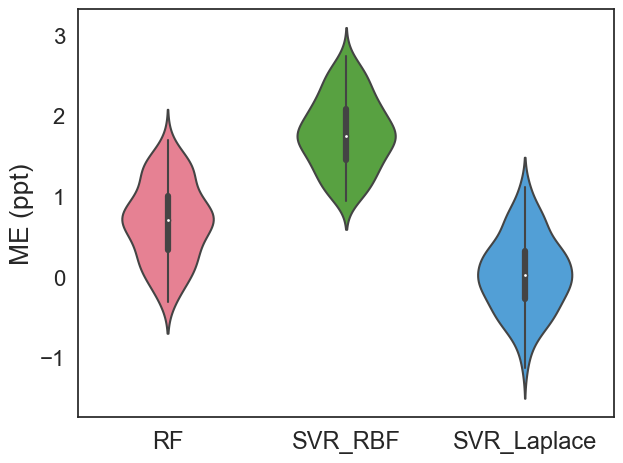

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(
    x='variable', y='value', data=df_me_melted,
    width=0.55,
    palette="husl",  
    inner="box",
     
)

sns.set(style="white")

plt.xlabel('', fontsize=20)
plt.ylabel('ME (ppt)', fontsize=19)
plt.xticks(fontsize=17)
plt.yticks(fontsize=16)

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
file_name = 'violin_plot_sen_me.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()
